In [9]:
#Requied libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Loading CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


2025-03-11 16:33:20.910724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 143s 1us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


/var/folders/b6/lt8jys990g71rkbv946vqk9c0000gp/T/ipykernel_81050/260140420.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


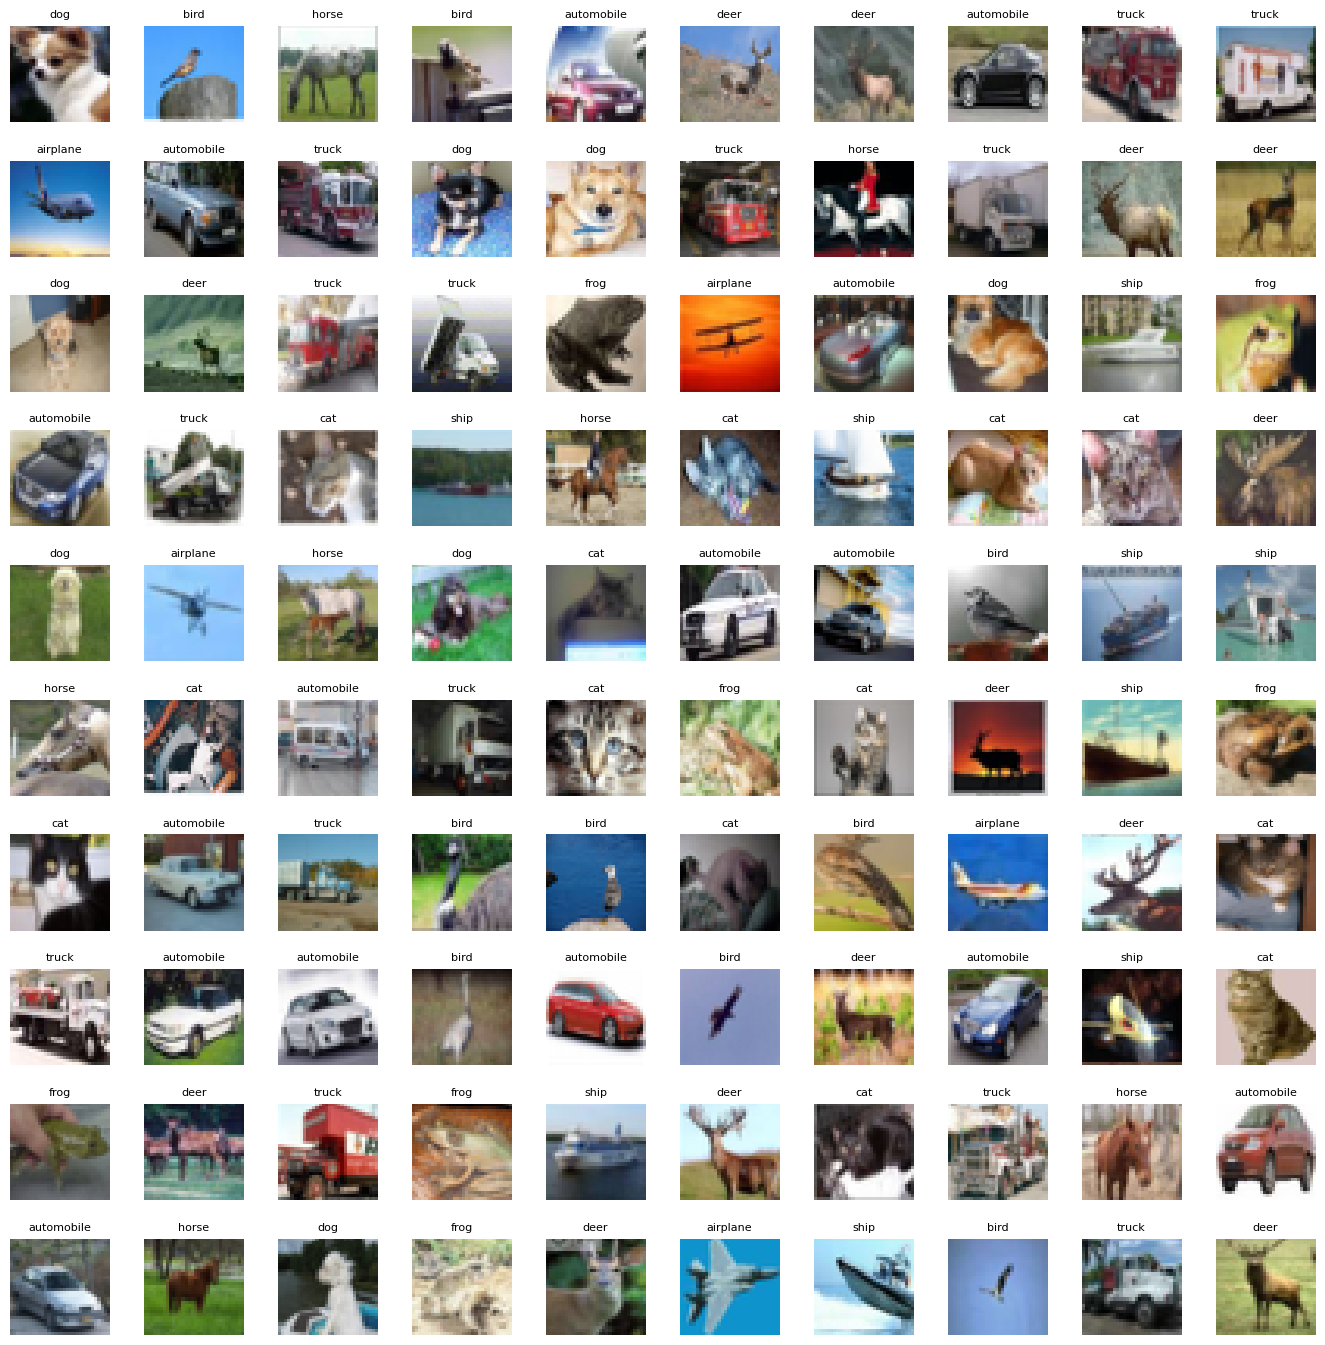

In [11]:
# The labels present in the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 
n_train = len(X_train) 

for i in np.arange(0, W_grid * L_grid): 

    
    index = np.random.randint(0, n_train)
     
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [15]:
from tensorflow.keras.utils import to_categorical
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [17]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

/Users/Sravani/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/Sravani/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 336ms/step - accuracy: 0.3005 - loss: 2.2584 - val_accuracy: 0.1620 - val_loss: 2.7301 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 164s 420ms/step - accuracy: 0.4969 - loss: 1.4252 - val_accuracy: 0.5572 - val_loss: 1.2672 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 509ms/step - accuracy: 0.5714 - loss: 1.2257 - val_accuracy: 0.6418 - val_loss: 1.0518 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 193s 493ms/step - accuracy: 0.6278 - loss: 1.0887 - val_accuracy: 0.6040 - val_loss: 1.2040 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 195s 499ms/step - accuracy: 0.6573 - loss: 1.0081 - val_accuracy: 0.6158 - val_loss: 1.1661 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 529ms/step - accuracy: 0.6790 - loss: 0.9559 - val_accuracy: 0.6210 - val_loss: 1.1418 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 196s 500ms/step - accura

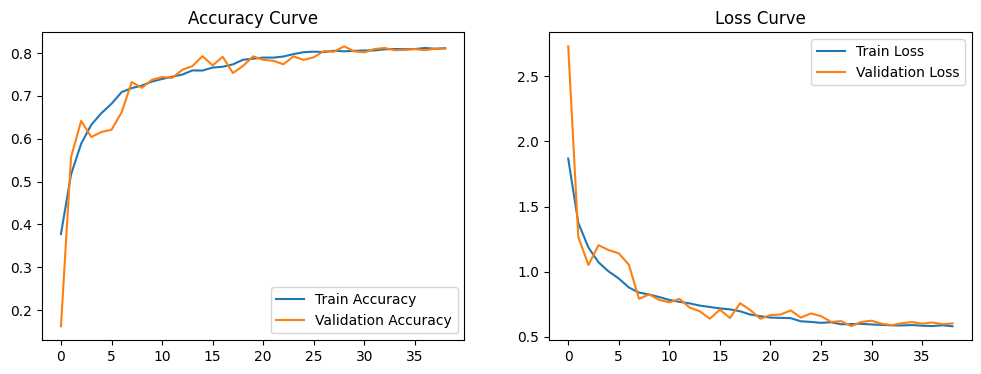

In [29]:
#BASIC CNN
import tensorflow as tf
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# preprocessing (normalization)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# preprocessing (augmentation)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# CNN model
model = Sequential([
    
    layers.Conv2D(32, (3,3), padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    #neural network 
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# modelling by setting Adam optimizer.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Implementing earlystopping.
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=3)
]

# Training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

# Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

#Plotting the accuracy for both training and testing(validation)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

#Plotting the loss for both training and testing(validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


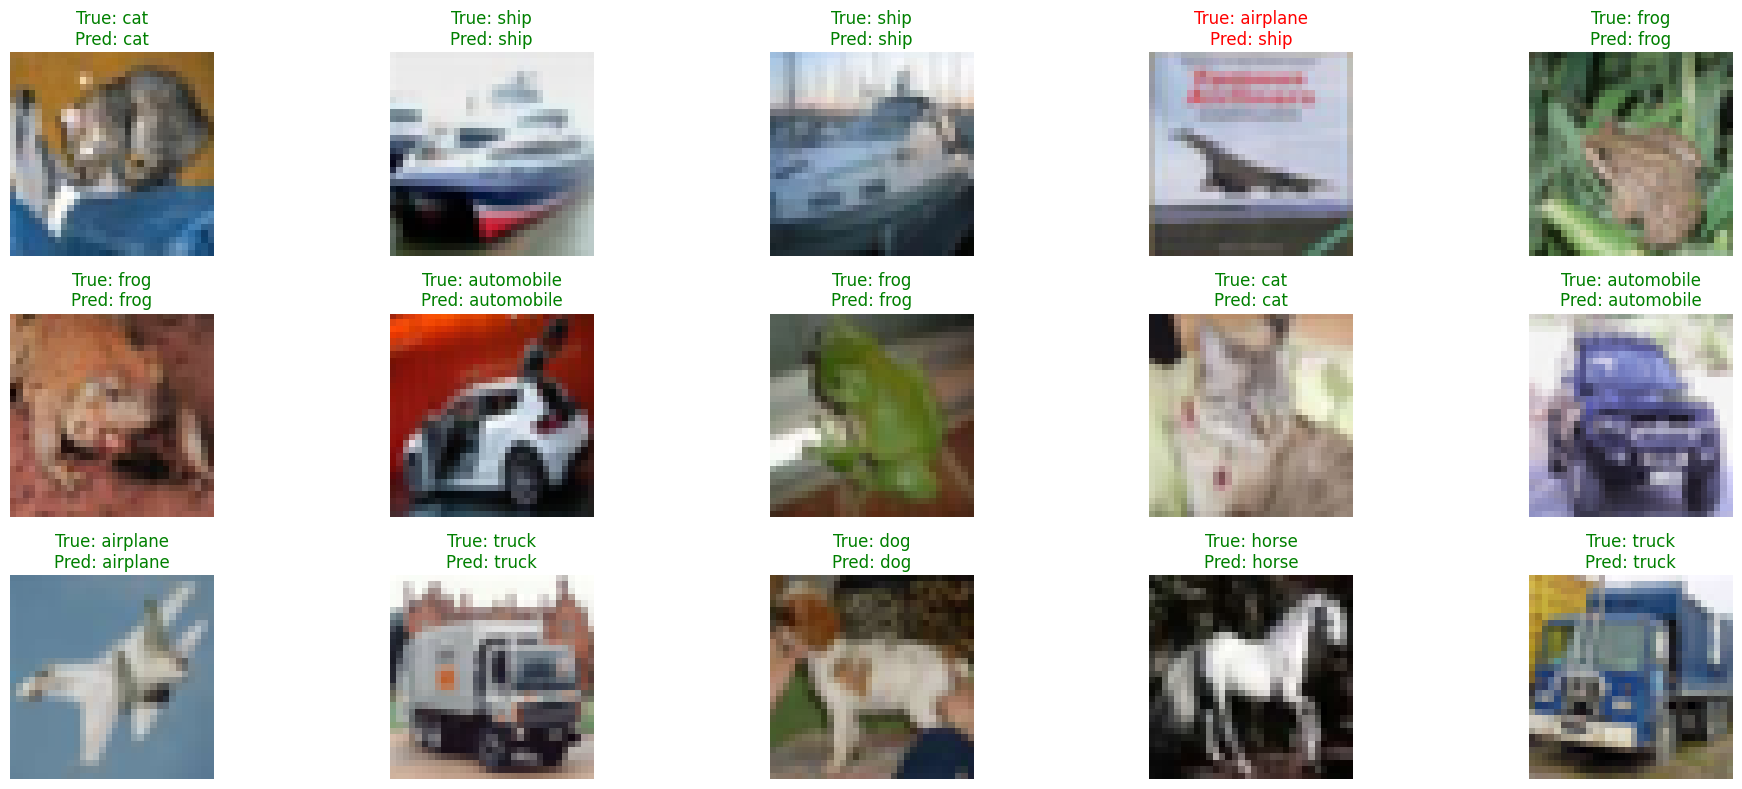

In [31]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt

# Classes: CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


num_images = 15
predictions = model.predict(x_test[:num_images])
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize=(20, 8))
for i in range(num_images):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i])
    
    
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[predicted_labels[i]]
    
    
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report:

              precision    recall  f1-score   support

           0     0.8468    0.8460    0.8464      1000
           1     0.9451    0.9300    0.9375      1000
           2     0.8273    0.6800    0.7464      1000
           3     0.7568    0.5880    0.6618      1000
           4     0.7473    0.8250    0.7842      1000
           5     0.8642    0.6490    0.7413      1000
           6     0.6092    0.9680    0.7478      1000
           7     0.8860    0.8470    0.8661      1000
           8     0.9048    0.9120    0.9084      1000
           9     0.9059    0.9150    0.9104      1000

    accuracy                         0.8160     10000
   macro avg     0.8293    0.8160    0.8150     10000
weighted avg     0.8293    0.8160    0.8150     10000



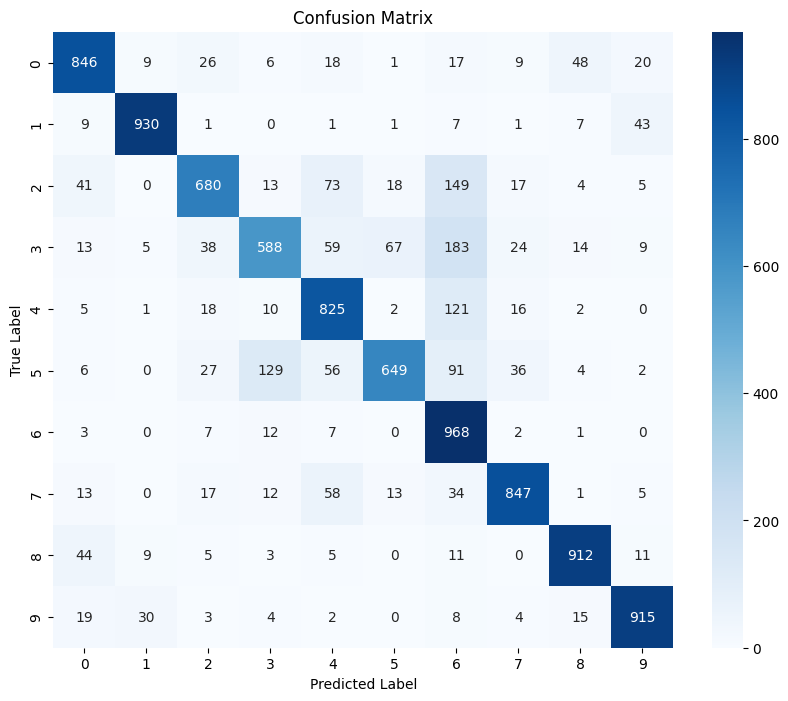

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns


y_pred_probs = model.predict(x_test)  
y_pred = np.argmax(y_pred_probs, axis=1)  

# Generating classification report for all the classes
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Computation 
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Findings:
In a comparison with GoogleNet and the simple CNN in the CIFAR-10 dataset, the result indicates that 
the simple CNN performs better than GoogleNet in generalization and stability despite its simpler architecture. 

In spite of the fact that GoogleNet has a higher training accuracy (87.78%) than the CNN (81.10%), it is overfitting, 
as revealed by its lower test accuracy (76.27%). On the other hand, the plain CNN maintains
a nice validation-training accuracy balance, having a higher test accuracy of 81.60% and a lower test loss (0.5830 vs. 0.8247 for GoogleNet),
which implies better optimization.

In addition, the classification report shows that the CNN model has more consistent performance
across all classes, whereas GoogleNet struggles with certain categories for example class 3. GoogleNet is computationally expensive, and 
training was set to 10 epochs, whereas the simple CNN trained until 50 epochs but was halted earlier at 39 epochs with the help of
EarlyStopping,revealing a more efficient training. 

On the whole, the simple CNN proves to be the better choice for CIFAR-10 as it generalizes better,
avoids overfitting, and achieves higher accuracy with the help of a simpler and computationally lighter model.

ARCHITECTURAL CHANGES:
The most prominent architectural variations in the basic CNN and GoogleNet are with respect to complexity and structure. 
The basic CNN is a less complicated model with successive convolutional layers, max-pooling, dropout, and batch normalization 
that are all present to restrict overfitting and improve generalization. It uses basic max-pooling to reduce spatial dimensions. 
By contrast, GoogleNet applies inception blocks, which combine various convolution operations (1x1, 3x3, and 5x5) and max-pooling 
in parallel to learn a wider set of features across different scales. This multi-path approach increases model complexity, which
can be related to higher computational cost and increased risk of overfitting, especially on small datasets like CIFAR-10.




In [ ]:
#REFERENCES/CITATIONS:
1. Lecture Slides from 7-10
2. Kaggle
3. OpenAI 
4. GeeksforGeeks
5. Youtube.